# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):
    
    
    if Distance_Type == 'euclidean':
        
        Cluster_Distance = np.sqrt(np.sum((Data_points[:, np.newaxis, :] - Cluster_Centroids) ** 2, axis=2))
    elif Distance_Type == 'pearson':
        
        mean_data = np.mean(Data_points, axis=1, keepdims=True)
        mean_centroids = np.mean(Cluster_Centroids, axis=1, keepdims=True)
        centered_data = Data_points - mean_data
        centered_centroids = Cluster_Centroids - mean_centroids
        numerator = np.sum(centered_data[:, np.newaxis, :] * centered_centroids, axis=2)
        denominator = np.sqrt(np.sum(centered_data * 2, axis=2)) * np.sqrt(np.sum(centered_centroids * 2, axis=2))
        Cluster_Distance = 1 - (numerator / denominator)
    else:
        raise ValueError("Distance_Type must be either 'euclidean' or 'pearson'.")
    
    
    return Cluster_Distance
   

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [20]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type, tolerance=1e-4):

    # Extracting the number of data points and features from the given data
    num_data_points, num_features = Data_points.shape

    # Calculating the range of each feature in the dataset
    data_ranges = np.ptp(Data_points, axis=0)

    # Initializing cluster centroids randomly within the data ranges
    Cluster_Centroids = np.random.rand(Number_of_Clusters, num_features) * data_ranges

    # Initializing iteration count and old cluster centroids for convergence check
    
    old_cluster_centroids = np.zeros_like(Cluster_Centroids)

    # List to store cluster metrics for each iteration
    cluster_metrics = []

    # Iterating until convergence (change in centroids is below tolerance)
    while np.linalg.norm(Cluster_Centroids - old_cluster_centroids) > tolerance:
        # Step 2: Cluster Assignment
        # Calculating distances between cluster centroids and data points
        Cluster_Distances = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        
        # Assigning each data point to the nearest cluster centroid
        Assigned_Clusters = np.argmin(Cluster_Distances, axis=1)
        
        # Calculating the minimum distances of data points to assigned centroids
        Cluster_Distances_Min = np.min(Cluster_Distances, axis=1)
        
        # Calculating cluster metric (sum of squared distances)
        Cluster_Metric = np.sum(Cluster_Distances_Min ** 2)
        cluster_metrics.append(Cluster_Metric)
        
        # Storing old cluster centroids for convergence check
        old_cluster_centroids = np.copy(Cluster_Centroids)
        
        # Updating cluster centroids based on the mean of data points in each cluster
        for i in range(Number_of_Clusters):
            points_in_cluster = Data_points[Assigned_Clusters == i]
            if len(points_in_cluster) > 0:
                Cluster_Centroids[i] = np.mean(points_in_cluster, axis=0)

    # Final distances of data points to assigned centroids
    Final_Cluster_Distance = Cluster_Distances_Min
    
    # Returning final cluster distances, cluster metrics, assigned clusters, and cluster centroids
    return Final_Cluster_Distance, cluster_metrics, Assigned_Clusters, Cluster_Centroids


## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [3]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [7]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km=[], num_clusters=0):
    color = 'brgcmyk'  # List colors
    alpha = 0.5  # Color opacity
    s = 20
    
    num_dimensions = X.shape[1]
    if num_dimensions != 2:
        raise ValueError("This function is designed for 2D data only.")
    
    if num_clusters == 0:
        plt.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    else:
        fig, axs = plt.subplots(num_clusters // 2, 2, figsize=(12, 6))
        axs = axs.flatten()
        for i in range(num_clusters):
            ax = axs[i]
            ax.scatter(X[km.labels_ == i, 0], X[km.labels_ == i, 1], c=color[i], alpha=alpha, s=s)
            ax.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c=color[i], marker='x', s=100)
            ax.set_title(f'Cluster {i+1}')
        if num_clusters % 2 != 0:
            fig.delaxes(axs[num_clusters])
        plt.tight_layout()
    plt.show()
def display_cluster_multi_dim(X,  num_clusters, km=[], color_palette=None):
    alpha = 0.5  
    s = 20

    if num_clusters == 0:
        print("Please provide the number of clusters (num_clusters > 0) to display clusters.")
    else:
        num_dimensions = X.shape[1]
        if num_dimensions == 2:
            fig, ax = plt.subplots(figsize=(8, 8))

            assigned_clusters_index = 2 if len(km) > 2 else 1

            for i in range(num_clusters):
                color = color_palette[i % len(color_palette)] if color_palette else 'brgcmyk'
                ax.scatter(X[km[assigned_clusters_index] == i, 0],
                           X[km[assigned_clusters_index] == i, 1],
                           c=color, alpha=alpha, s=s)
            ax.set_xlabel('Dimension 1')
            ax.set_ylabel('Dimension 2')
        else:
            fig, axes = plt.subplots(num_dimensions - 1, num_dimensions - 1, figsize=(15, 15))
            assigned_clusters_index = 2 if len(km) > 2 else 1

            for dim1 in range(num_dimensions - 1):
                for dim2 in range(dim1 + 1, num_dimensions):
                    ax = axes[dim1, dim2 - 1]
                    for i in range(num_clusters):
                        color = color_palette[i % len(color_palette)] if color_palette else 'brgcmyk'
                        ax.scatter(X[km[assigned_clusters_index] == i, dim1],
                                   X[km[assigned_clusters_index] == i, dim2],
                                   c=color, alpha=alpha, s=s)
                    ax.set_xlabel(f'Dimension {dim1 + 1}')
                    ax.set_ylabel(f'Dimension {dim2 + 1}')

            plt.tight_layout()

        plt.show()    

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

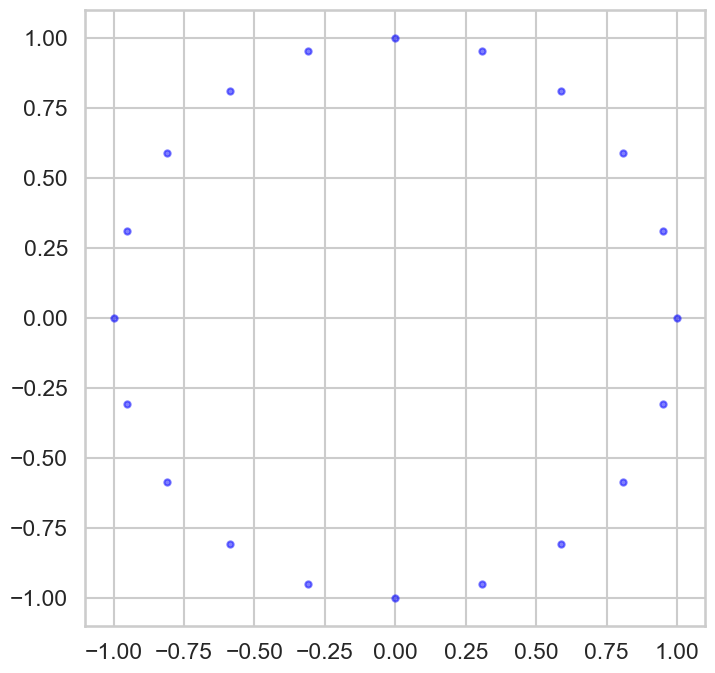

In [9]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

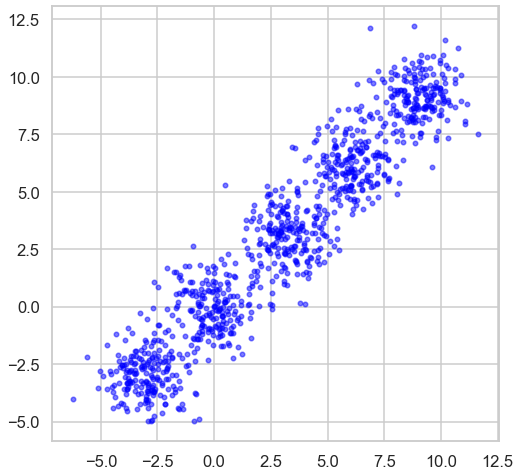

In [6]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

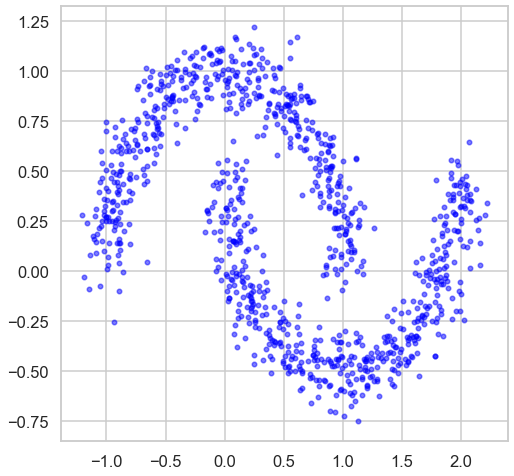

In [18]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

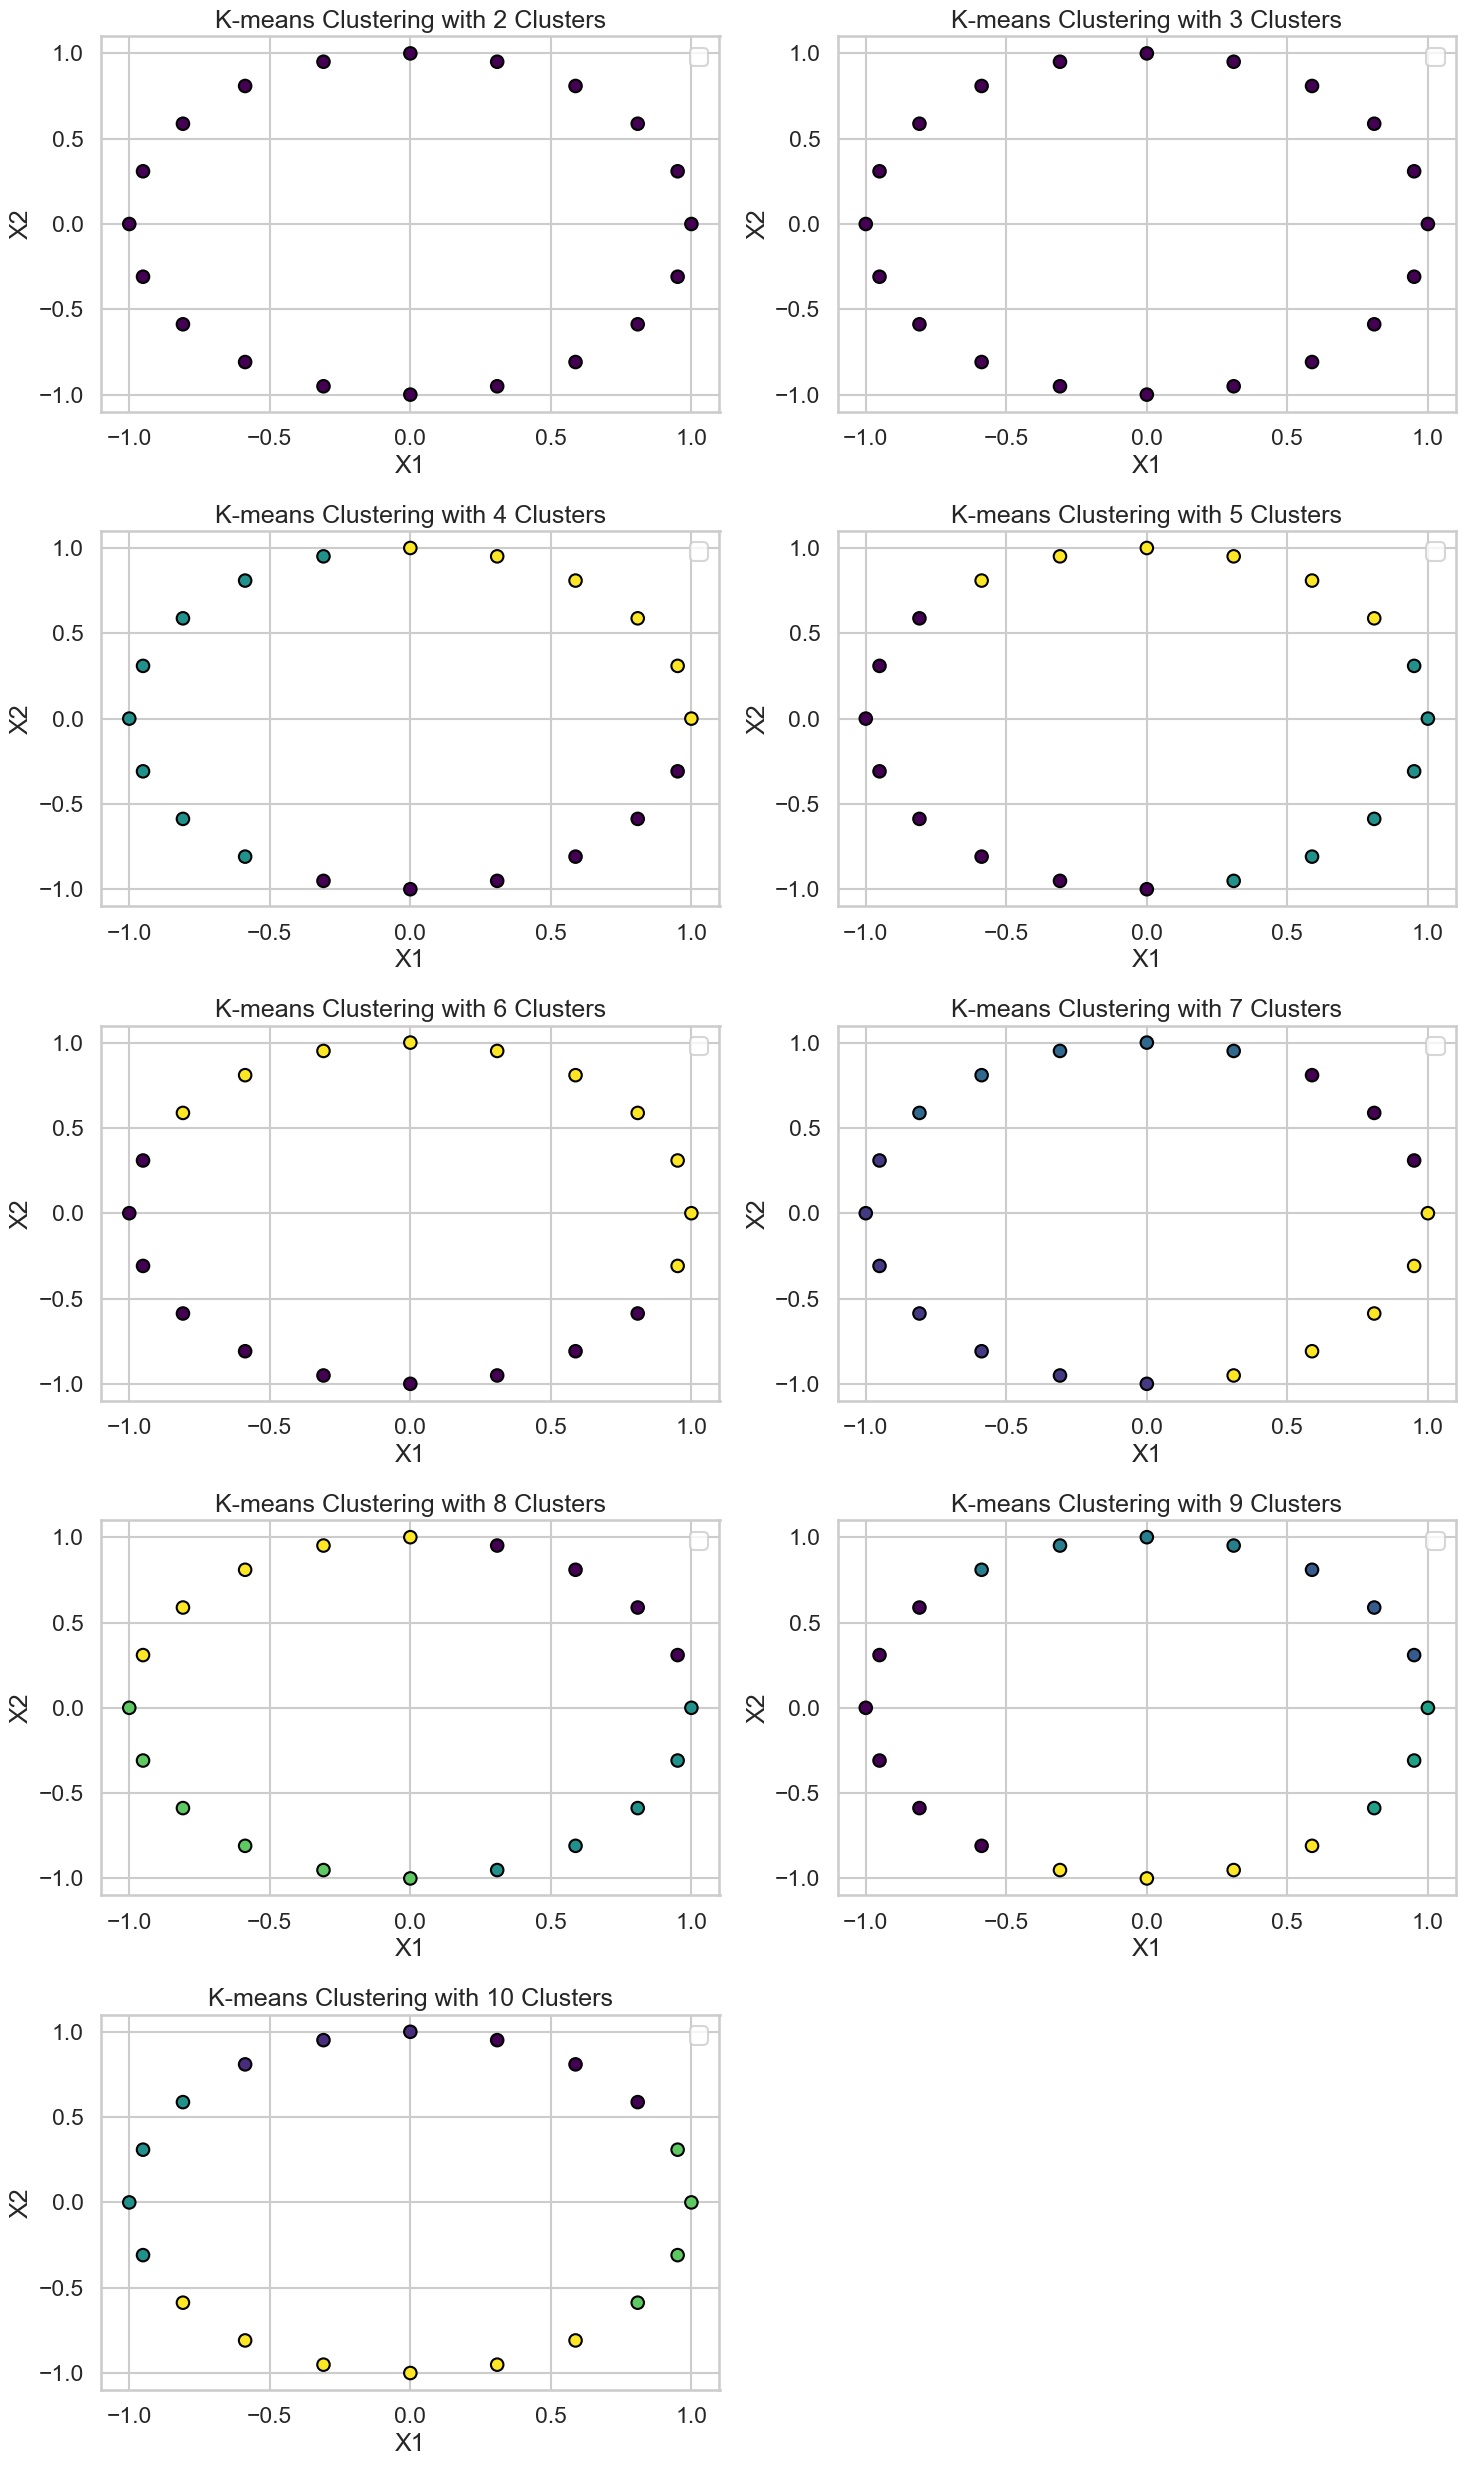

In [11]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
cluster_range=range(2,11)
num_plots = len(cluster_range)
num_rows = (num_plots + 1) // 2 
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axes = axes.flatten()
Distance_Type = 'euclidean'
for i, num_clusters in enumerate(cluster_range):
    _, _, Assigned_Clusters, Cluster_Centroids = GUC_Kmean(X, num_clusters, Distance_Type)
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=Assigned_Clusters, cmap='viridis', marker='o', edgecolors='k')
    
    ax.set_title(f'K-means Clustering with {num_clusters} Clusters')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()
    ax.grid(True)


for j in range(num_plots, num_rows * 2):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

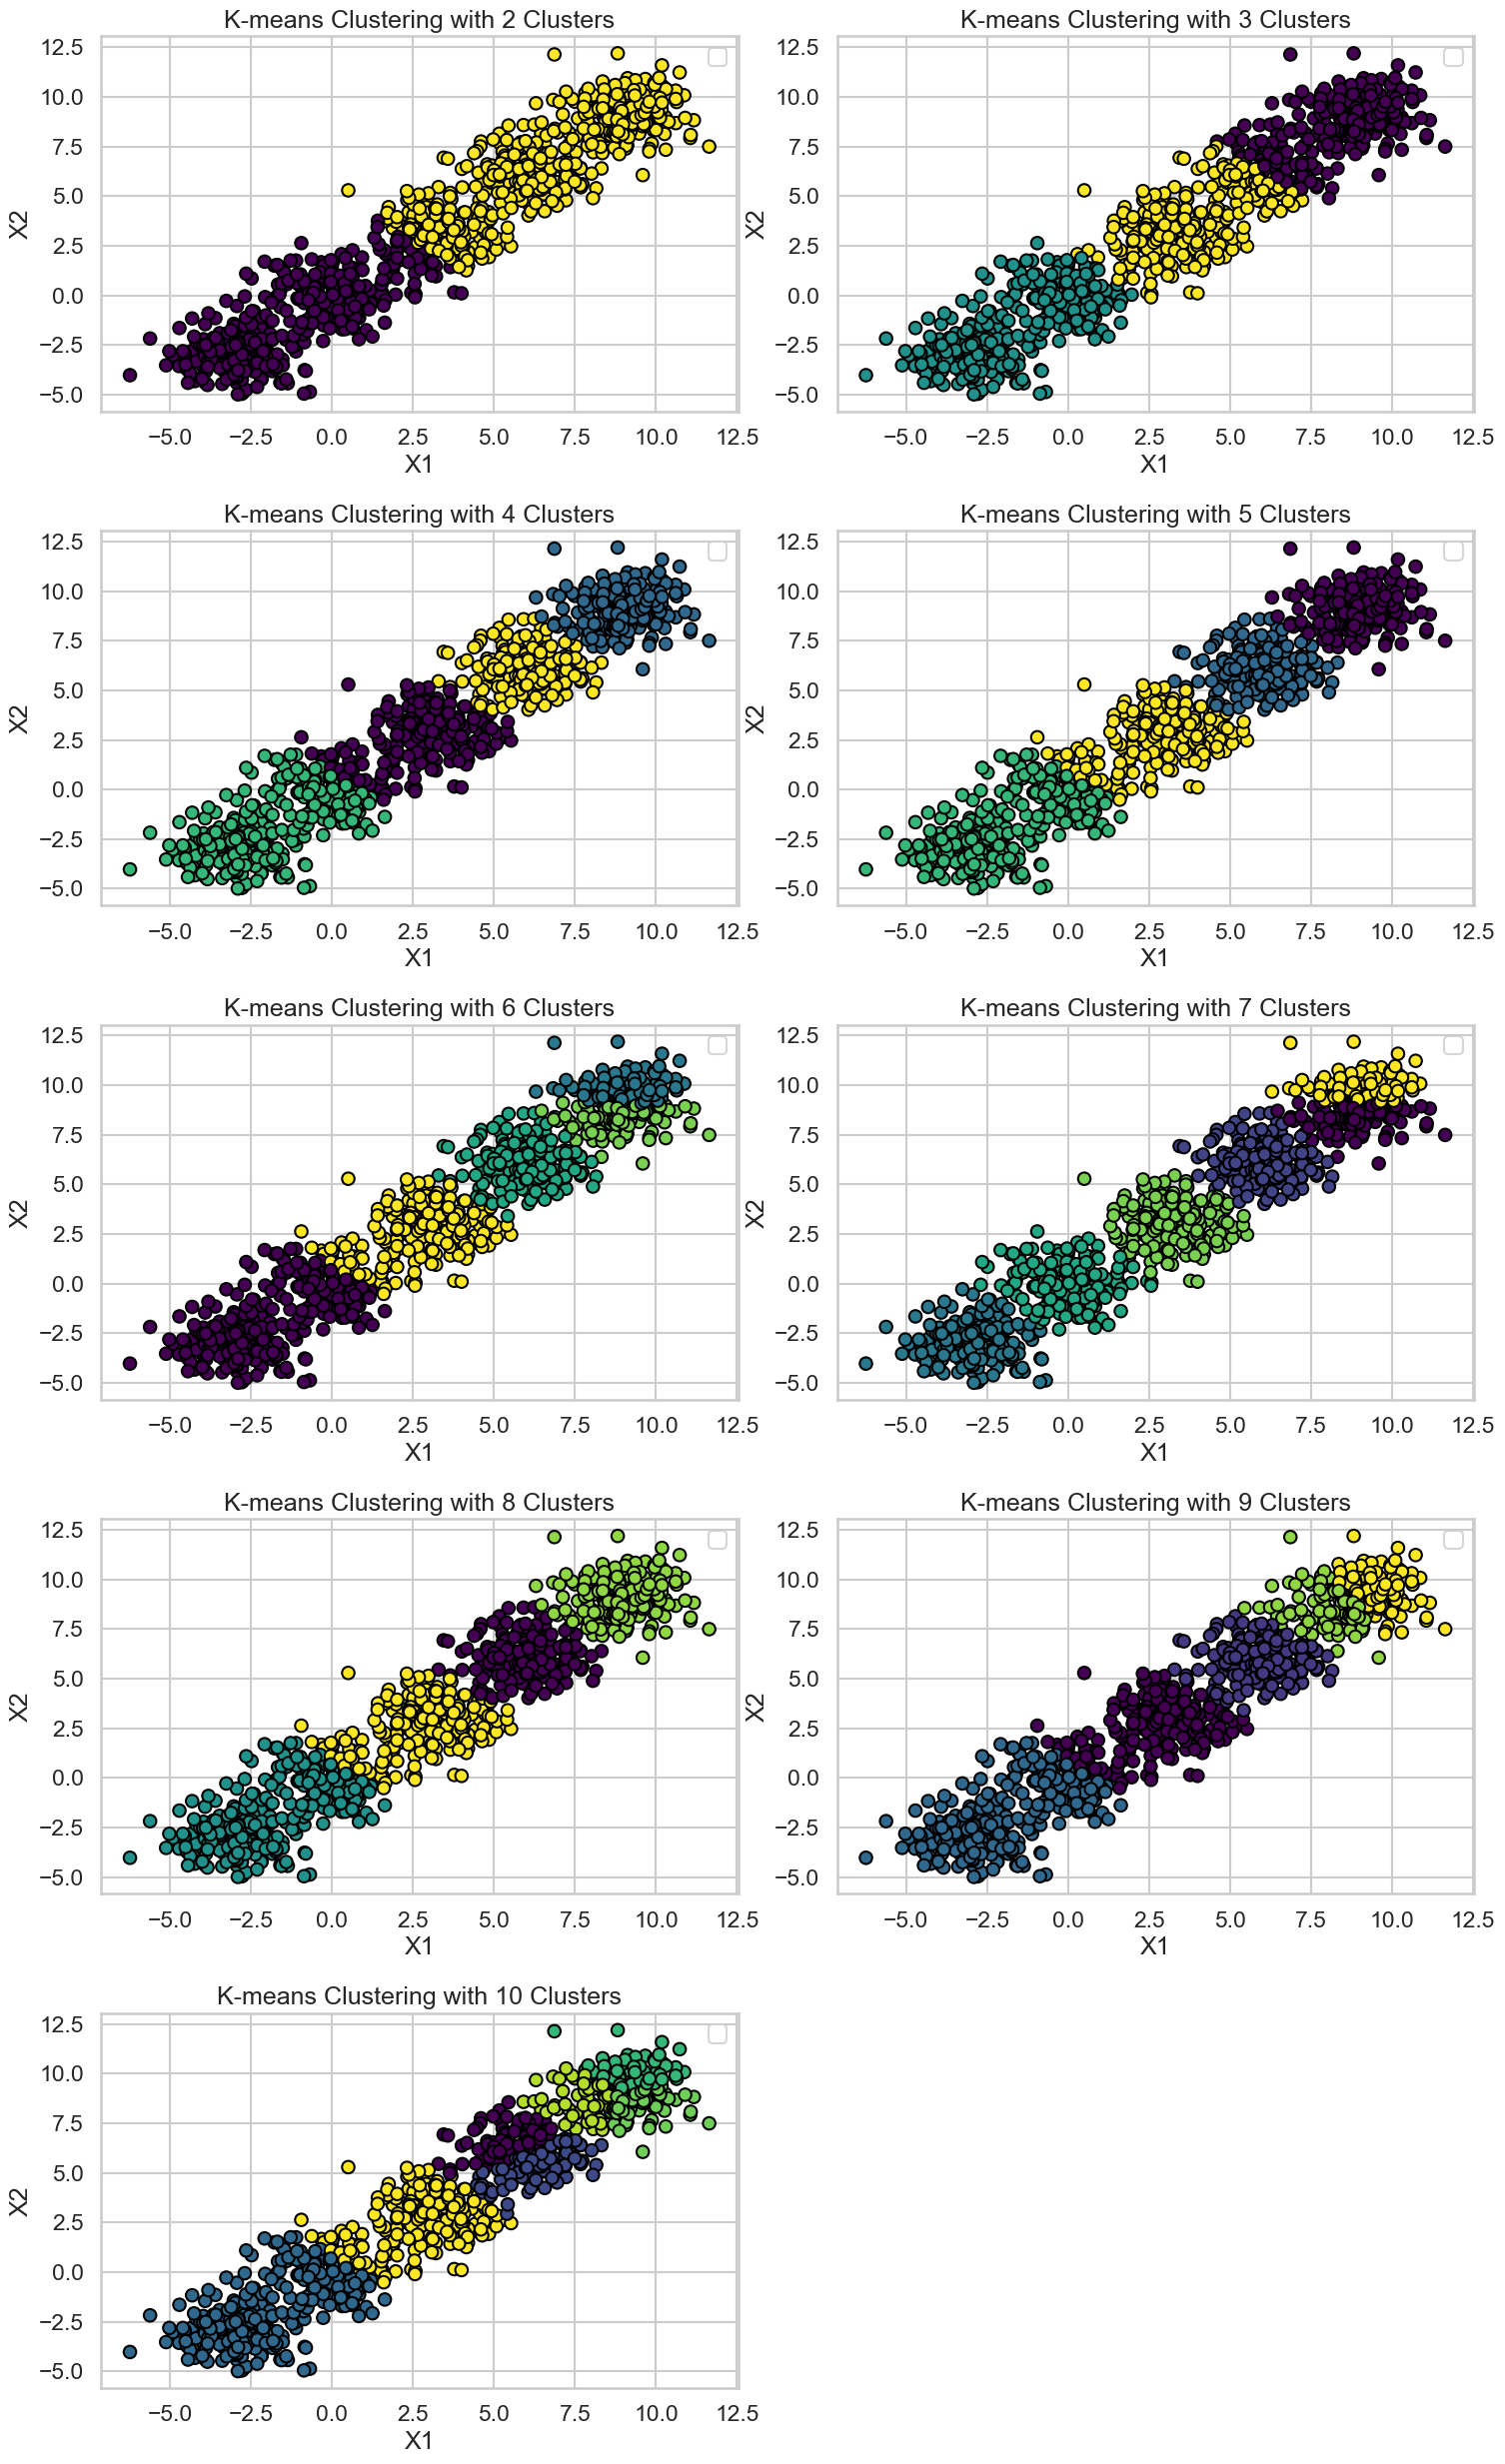

In [12]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
num_plots = len(cluster_range)
num_rows = (num_plots + 1) // 2  # Calculate the number of rows needed for the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, num_clusters in enumerate(cluster_range):
    _, _, Assigned_Clusters, Cluster_Centroids = GUC_Kmean(X, num_clusters, Distance_Type)
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=Assigned_Clusters, cmap='viridis', marker='o', edgecolors='k')
    
    ax.set_title(f'K-means Clustering with {num_clusters} Clusters')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()
    ax.grid(True)


for j in range(num_plots, num_rows * 2):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

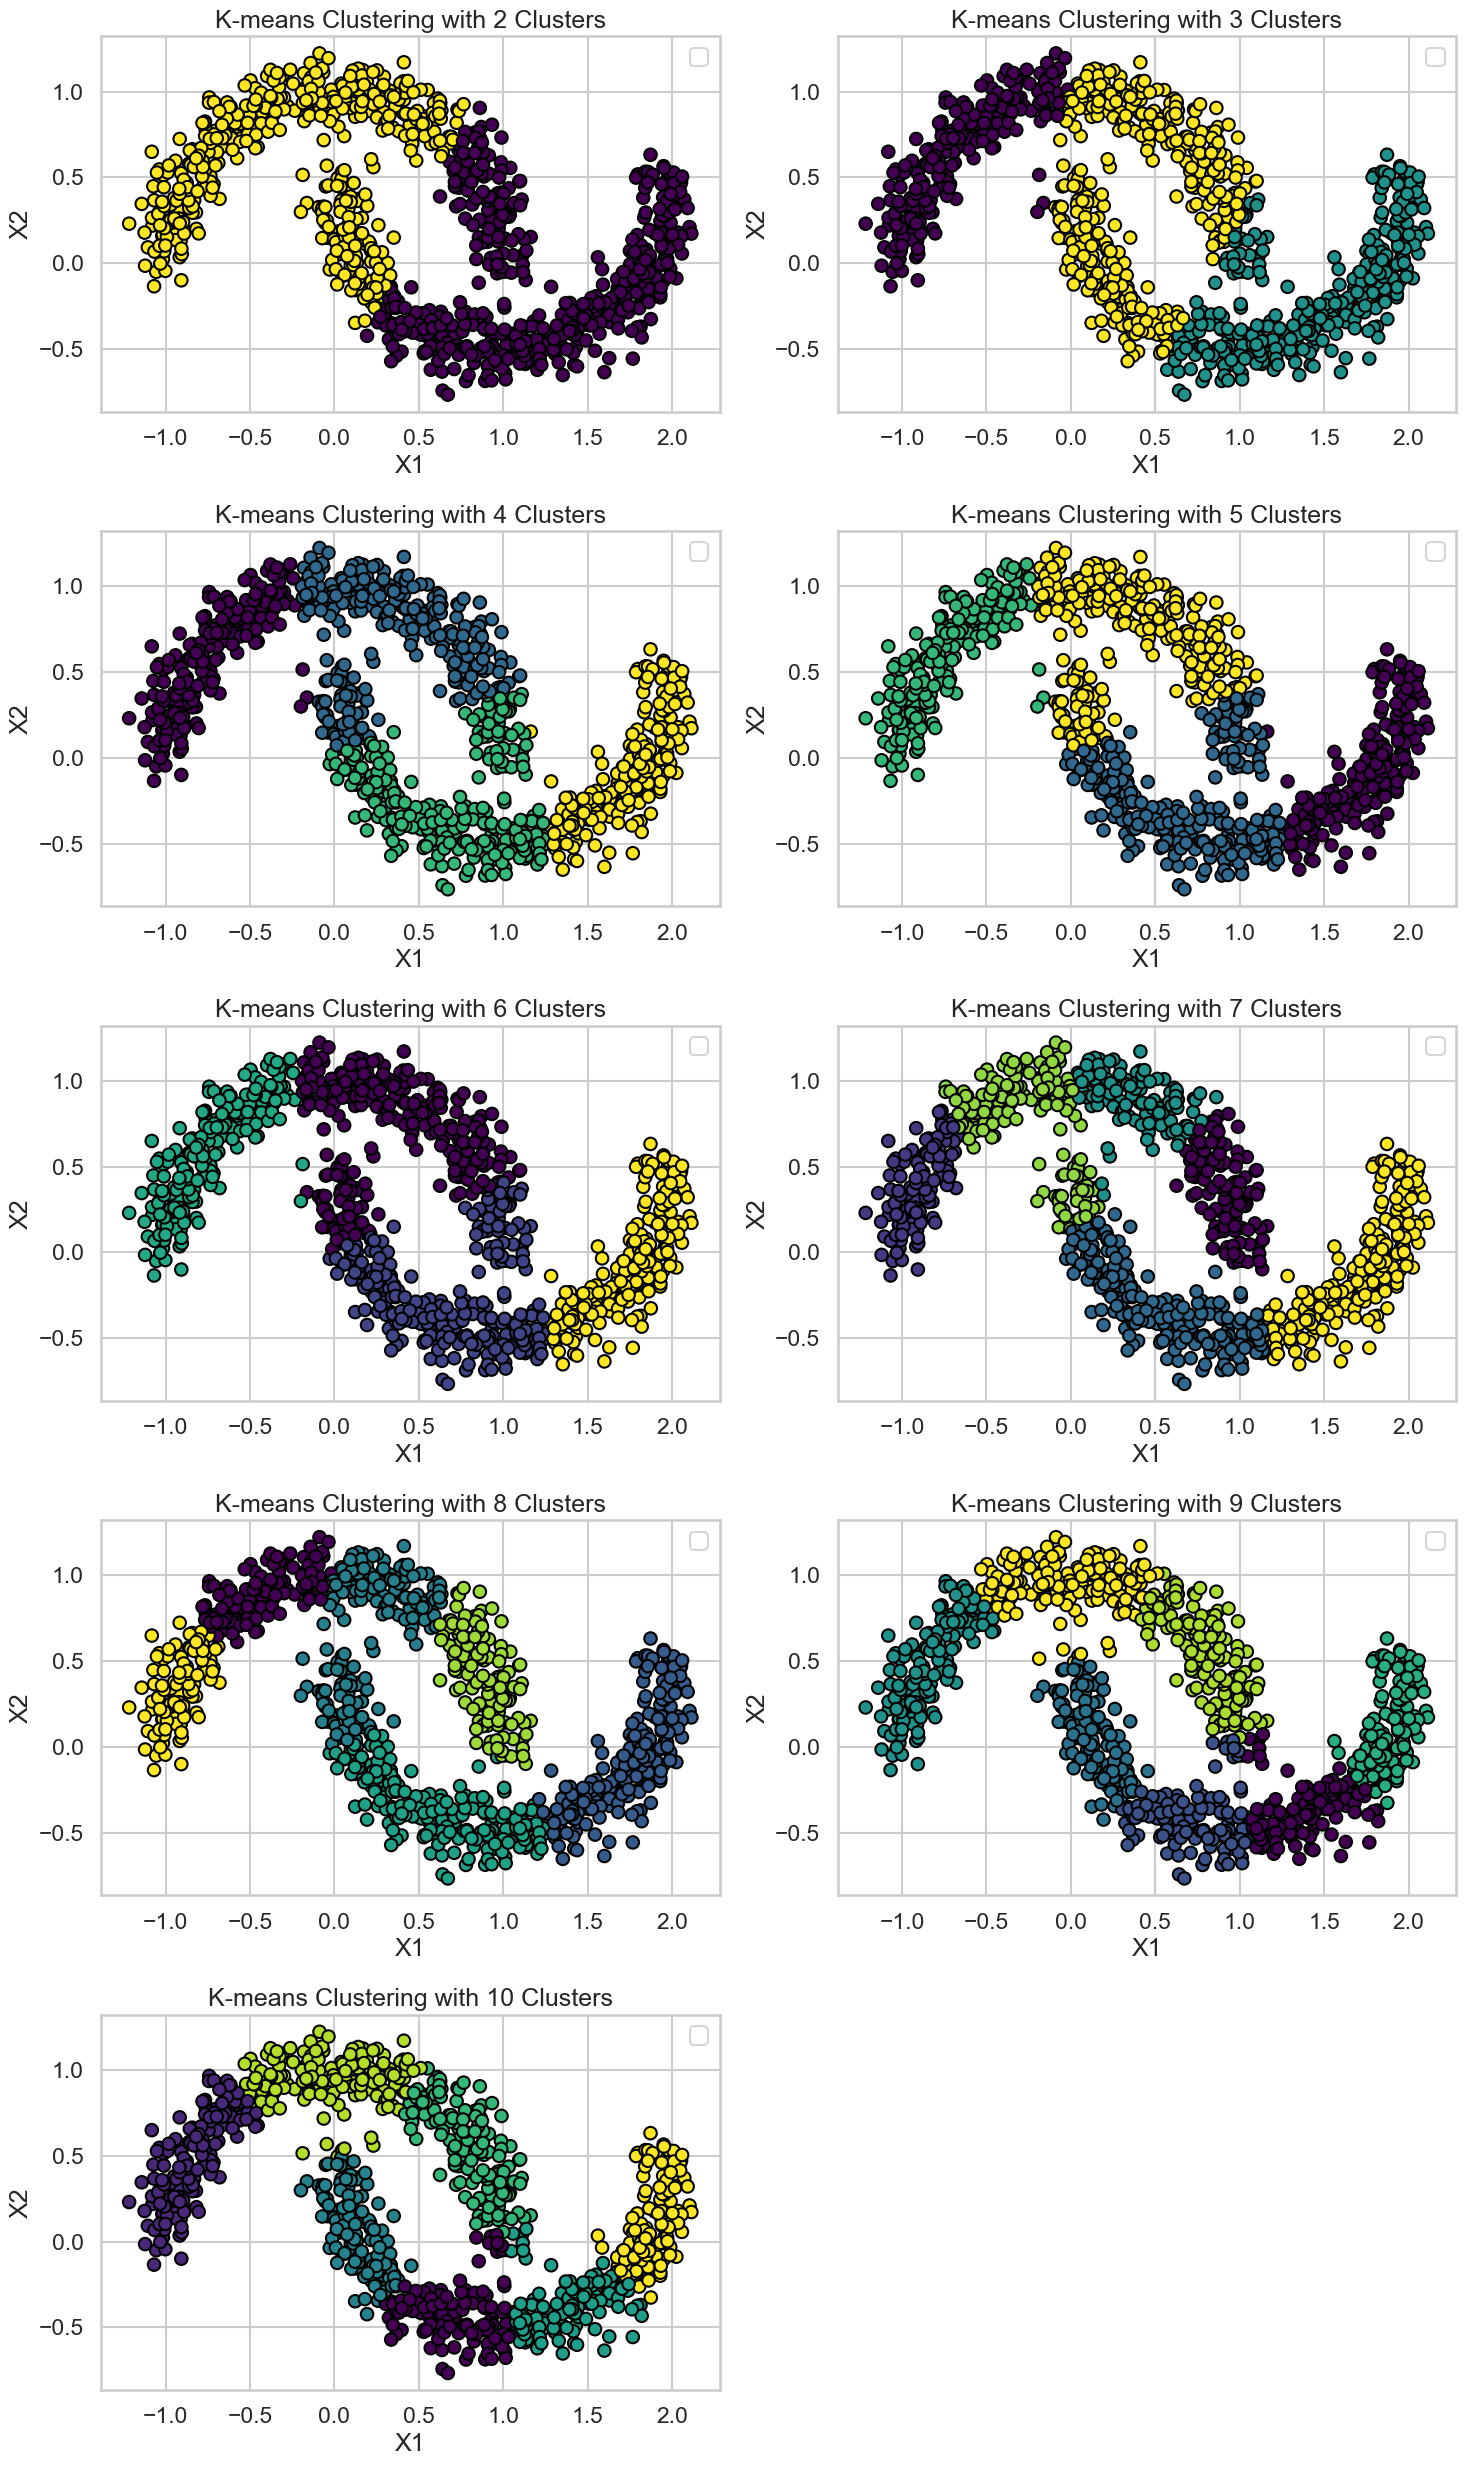

In [21]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
num_plots = len(cluster_range)
num_rows = (num_plots + 1) // 2  # Calculate the number of rows needed for the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, num_clusters in enumerate(cluster_range):
    _, _, Assigned_Clusters, Cluster_Centroids = GUC_Kmean(X, num_clusters, Distance_Type)
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=Assigned_Clusters, cmap='viridis', marker='o', edgecolors='k')
    
    ax.set_title(f'K-means Clustering with {num_clusters} Clusters')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()
    ax.grid(True)


for j in range(num_plots, num_rows * 2):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

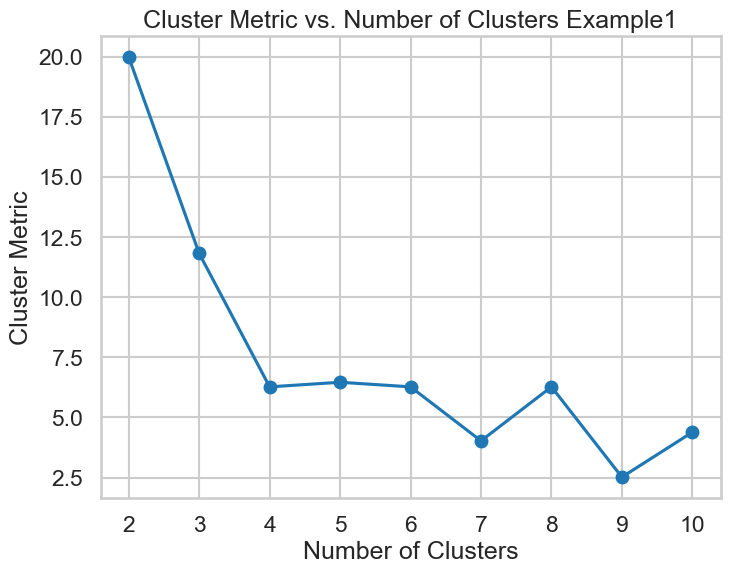

In [22]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
cluster_range = range(2, 11)

cluster_metrics = []

for num_clusters in cluster_range:
    _, cluster_metric, _, _ = GUC_Kmean(X, num_clusters, 'euclidean')
    cluster_metrics.append(cluster_metric[-1])  

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.title('Cluster Metric vs. Number of Clusters Example1')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.grid(True)
plt.show()

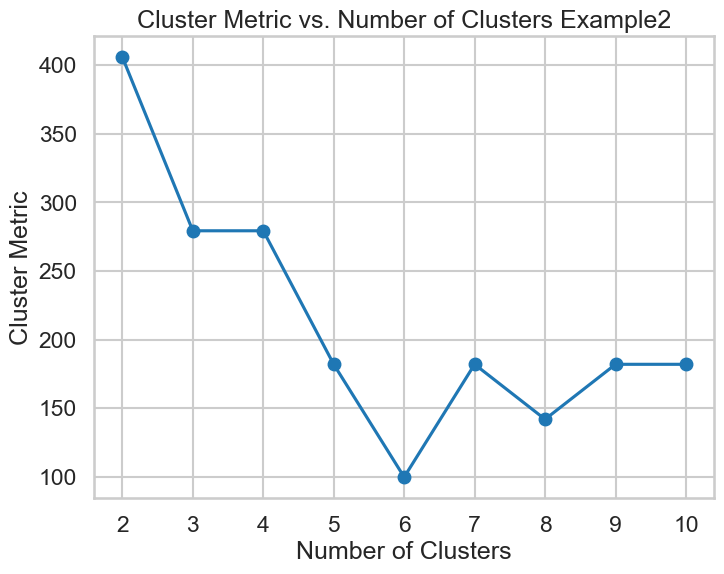

In [23]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
cluster_range = range(2, 11)

cluster_metrics = []


for num_clusters in cluster_range:
    _, cluster_metric, _, _ = GUC_Kmean(X, num_clusters, 'euclidean')
    cluster_metrics.append(cluster_metric[-1])  # Append the final cluster metric


plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.title('Cluster Metric vs. Number of Clusters Example2')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.grid(True)
plt.show()

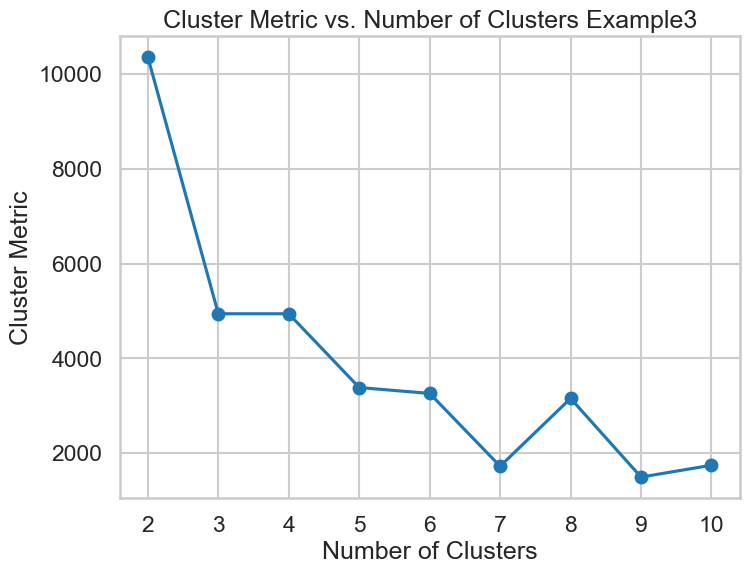

In [24]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
cluster_range = range(2, 11)

cluster_metrics = []

for num_clusters in cluster_range:
    _, cluster_metric, _, _ = GUC_Kmean(X, num_clusters, 'euclidean')
    cluster_metrics.append(cluster_metric[-1])  # Append the final cluster metric


plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.title('Cluster Metric vs. Number of Clusters Example3')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.grid(True)
plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

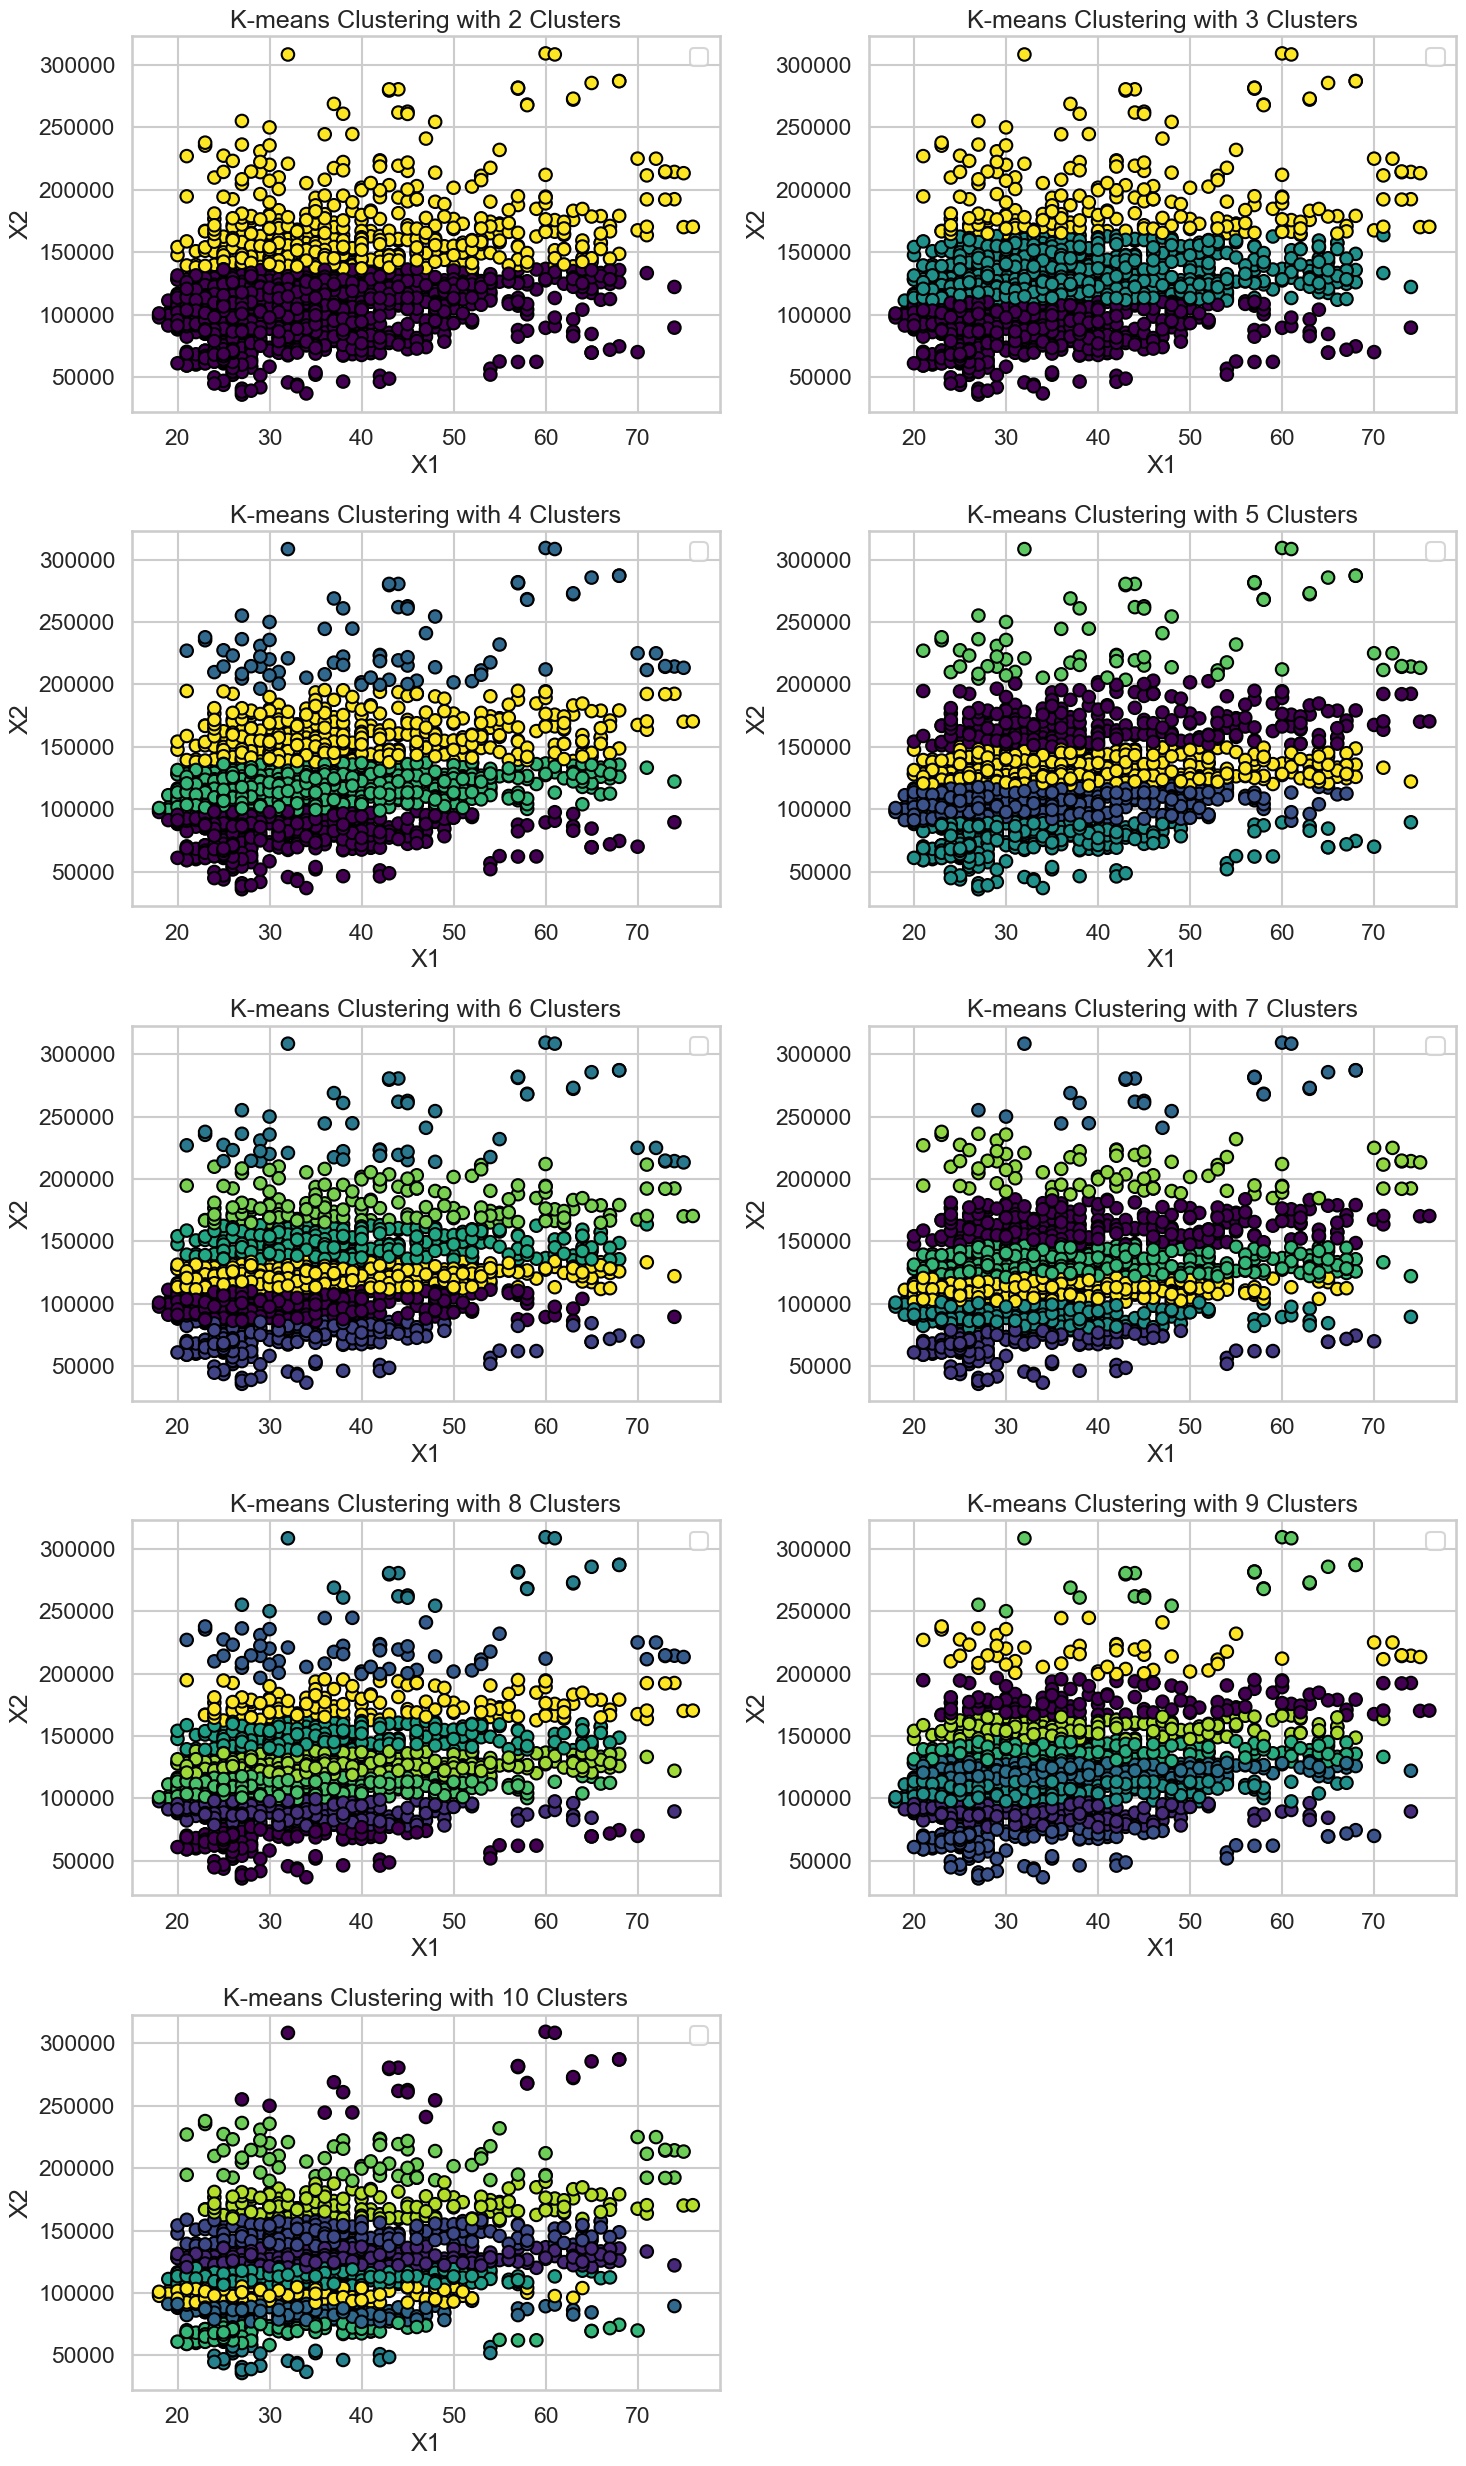

In [25]:
dir= "D:/Customer data.csv"
df=pd.read_csv(dir)
selected_features = ['Age', 'Income']


X = df[selected_features].values
Final_Cluster_Distance, cluster_metrics, Assigned_Clusters, Cluster_Centroids = GUC_Kmean(X, num_clusters, Distance_Type)
num_plots = len(cluster_range)
num_rows = (num_plots + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, num_clusters in enumerate(cluster_range):
    _, _, Assigned_Clusters, Cluster_Centroids = GUC_Kmean_Updated(X, num_clusters, Distance_Type)
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=Assigned_Clusters, cmap='viridis', marker='o', edgecolors='k')
    
    ax.set_title(f'K-means Clustering with {num_clusters} Clusters')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()
    ax.grid(True)


for j in range(num_plots, num_rows * 2):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

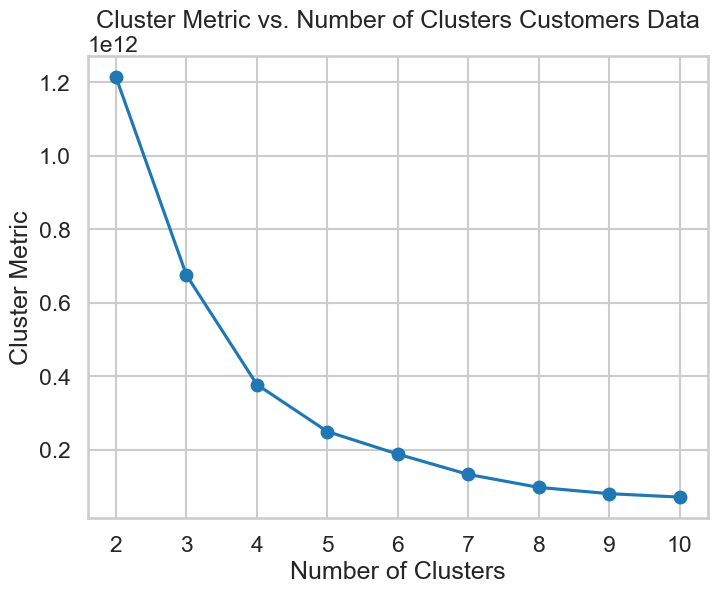

In [27]:
X = df[selected_features].values
cluster_range = range(2, 11)

cluster_metrics = []

for num_clusters in cluster_range:
    _, cluster_metric, _, _ = GUC_Kmean(X, num_clusters, 'euclidean')
    cluster_metrics.append(cluster_metric[-1]) 


plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.title('Cluster Metric vs. Number of Clusters Customers Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.grid(True)
plt.show()